<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use. 

Please note, at any point in time, to use the Generative AI tool, click on `TAI` the teaching assistant in the laft bar.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m1/images/TAI.png" width="20%">


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 187.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 144.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [45]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0272EN-SkillsNetwork/labs/dataset/2016.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.


In [46]:
def read_csv_and_print(file_path):
    # Step 1: Read the CSV file into a pandas DataFrame
    # Assuming the first row contains the column headers
    df = pd.read_csv(file_path, header=0)
    
    # Step 2: Print the first 5 rows of the DataFrame
    print(df.head())
    
    # Return the DataFrame
    return df

# Call the function and store the DataFrame in a variable
df = read_csv_and_print(file_path)

# Now you can use df outside the function
print(df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval Upper Confidence Interval  \
0                      7.460                     7.592   
1                      7.428                      7.59   
2                      7.333                     7.669   
3                      7.421                     7.575   
4                      7.351                     7.475   

  Economy (GDP per Capita)   Family Health (Life Expectancy)  Freedom  \
0                  1.44178  1.16374                  0.79504  0.57941   
1                  1.52733  1.14524                  0.86303  0.58557   
2                  1.42666  1

In [47]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


**Data Cleaning - Checking for correct data types**

In [48]:

# Step 2: Print the data types of each column
print("\nData types of columns:")
print(df.dtypes)

# Step 3: Check for unsuitable column data types
# Flag for identifying problematic columns
problematic_columns = []

for col, dtype in df.dtypes.items():
    if dtype == 'object':  # String/Text column
        if df[col].isnull().sum() > 0:
            problematic_columns.append((col, "Contains null values"))
    elif dtype in ['int64', 'float64']:  # Numeric columns
        if df[col].isnull().sum() > 0:
            problematic_columns.append((col, "Contains null values"))
        non_numeric_found = df[col].apply(lambda x: isinstance(x, (int, float))) != df[col].apply(lambda x: True)
        if non_numeric_found.any():
            problematic_columns.append((col, "Contains non-numeric values"))
    else:
        problematic_columns.append((col, f"Unsupported type: {dtype}"))

# Print any problematic columns
if problematic_columns:
    print("\nProblems identified in column types:")
    for col, issue in problematic_columns:
        print(f"- {col}: {issue}")


Data types of columns:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Problems identified in column types:
- Lower Confidence Interval: Contains null values
- Upper Confidence Interval: Contains null values
- Economy (GDP per Capita): Contains null values
- Health (Life Expectancy): Contains null values


**Data Cleaning - Change the data types**

In [49]:
import pandas as pd
import numpy as np

def clean_dataframe(df, type_dict):
    # Step 1: Remove leading and trailing whitespaces from all columns
    df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

    # Step 2: Replace empty strings with NaN
    df.replace('', np.nan, inplace=True)

    # Step 3: Change the data type of the columns to the appropriate type
    for column_name, column_type in type_dict.items():
        if column_name in df.columns:  # Vérification que la colonne existe
            if column_type == 'category':
                df[column_name] = df[column_name].astype('category')
            elif column_type == 'float64':
                df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            elif column_type == 'int64':
                df[column_name] = pd.to_numeric(df[column_name], errors='coerce').fillna(0).astype('int64')
            else:
                raise ValueError(f"Unsupported type: {column_type}")

    return df

# Définition des types souhaités
type_dict = {
    'column1': 'int64',
    'column2': 'category',
    'column3': 'float64'
}

df = clean_dataframe(df, type_dict)
print(df.dtypes)
print(df)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                       

In [39]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [58]:
# Convert object-type columns to float, coercing errors into NaN
df['Upper Confidence Interval'] = pd.to_numeric(df['Upper Confidence Interval'], errors='coerce')
df['Economy (GDP per Capita)'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')
df['Health (Life Expectancy)'] = pd.to_numeric(df['Health (Life Expectancy)'], errors='coerce')
df['Freedom'] = pd.to_numeric(df['Freedom'], errors='coerce')
# Display DataFrame with updated types
print(df.dtypes)
print(df)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                       

**Data Cleaning - Checking for missing values**

In [50]:
import pandas as pd
import numpy as np

def handle_missing_values(df):
    # Step 1: Identify columns with missing values
    missing_cols = df.columns[df.isnull().any()].tolist()
    print(f"Columns with missing values: {missing_cols}")

    # Step 2: Replace missing values with column mean (only for numeric columns)
    df.fillna({col: df[col].mean() for col in missing_cols if df[col].dtype in ['int64', 'float64']}, inplace=True)

    # Inform about skipped non-numeric columns
    for col in missing_cols:
        if df[col].dtype not in ['int64', 'float64']:
            print(f"Skipping non-numeric column: {col}")

    return df

df = handle_missing_values(df)

print("\nUpdated DataFrame:")
print(df)

Columns with missing values: ['Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']
Skipping non-numeric column: Upper Confidence Interval
Skipping non-numeric column: Economy (GDP per Capita)
Skipping non-numeric column: Health (Life Expectancy)
Skipping non-numeric column: Freedom

Updated DataFrame:
         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154 

In [51]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        3
Economy (GDP per Capita)         2
Family                           0
Health (Life Expectancy)         3
Freedom                          1
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**Data Insights and Visualization**

In [59]:
df['Health (Life Expectancy)'].dtype

dtype('float64')

>Identify the GDP per capita and Healthy Life Expectancy of the top 10 countries.

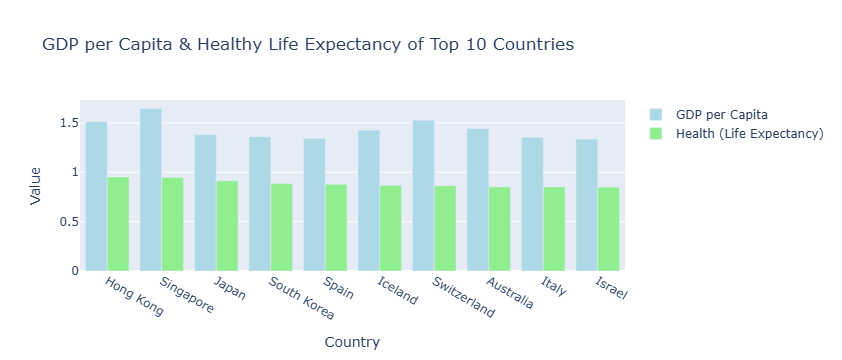

In [60]:
import pandas as pd
import plotly.graph_objects as go

# Select top 10 countries based on Healthy Life Expectancy
df_top10 = df.nlargest(10, 'Health (Life Expectancy)')

# Create bar chart using Plotly
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=df_top10['Country'],
    y=df_top10['Economy (GDP per Capita)'],
    name='GDP per Capita',
    marker_color='lightblue'
))

fig1.add_trace(go.Bar(
    x=df_top10['Country'],
    y=df_top10['Health (Life Expectancy)'],
    name='Health (Life Expectancy)',
    marker_color='lightgreen'
))

# Update layout
fig1.update_layout(
    title="GDP per Capita & Healthy Life Expectancy of Top 10 Countries",
    xaxis_title="Country",
    yaxis_title="Value",
    barmode='group'
)

# Show the figure
fig1.show()

>Find the correlation between the Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity and Happiness score. You may like to represent the correlation as a heatmap of a readable, visually appealing size.

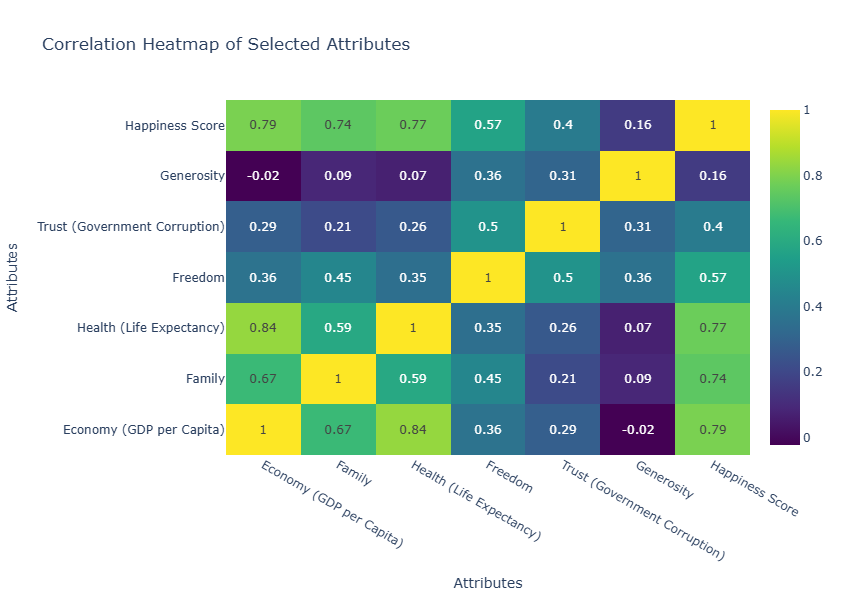

In [61]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Create a sub-dataset with selected attributes
selected_columns = [
    'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
    'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score'
]

df_subset = df[selected_columns]

# Step 2: Compute correlation matrix
correlation_matrix = df_subset.corr()

# Step 3: Create a heatmap using Plotly
fig2 = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis',
    text=correlation_matrix.round(2).values,  # Display correlation values
    texttemplate="%{text}",  # Format text inside heatmap cells
))

# Update layout
fig2.update_layout(
    title="Correlation Heatmap of Selected Attributes",
    xaxis_title="Attributes",
    yaxis_title="Attributes",
    width=800,
    height=600
)

# Show the figure
fig2.show()


>Create a scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions. Use plotly for creating the plot.

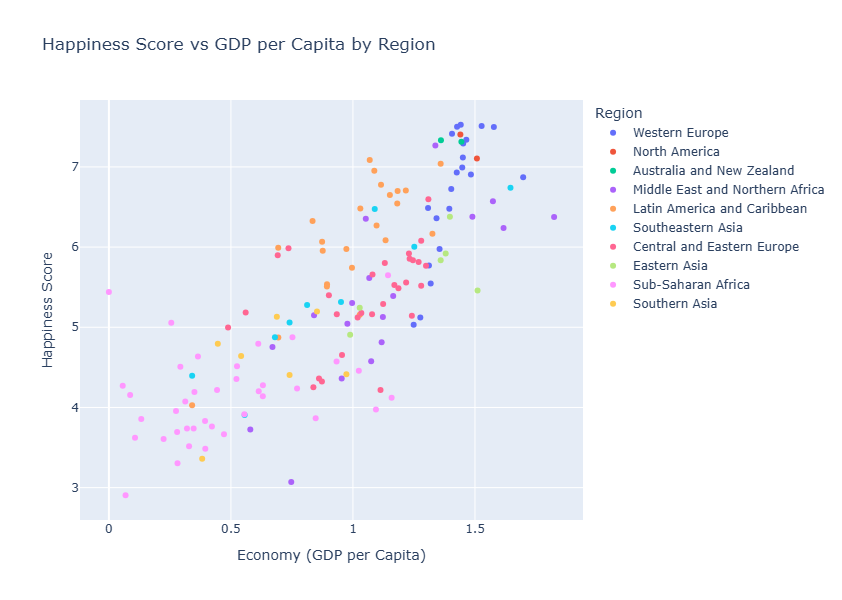

In [62]:
import pandas as pd
import plotly.express as px


# Create scatter plot using Plotly
fig3 = px.scatter(
    df,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    color='Region',
    hover_data=['Country'],
    title="Happiness Score vs GDP per Capita by Region",
    labels={'GDP per Capita': 'GDP per Capita ($)', 'Happiness Score': 'Happiness Score'},
    width=800,
    height=600
)

# Show the figure
fig3.show()

>Create a pie chart to present Happiness Score by Regions

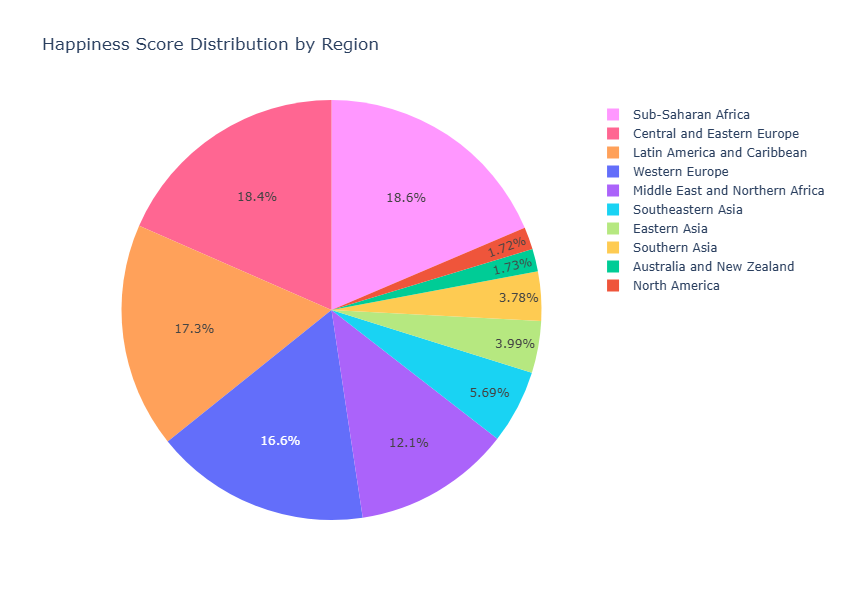

In [63]:
import pandas as pd
import plotly.express as px

# Create pie chart using Plotly
fig4 = px.pie(
    df,
    values='Happiness Score',
    names='Region',
    title="Happiness Score Distribution by Region",
    color='Region',
    width=800,
    height=600
)

# Show the figure
fig4.show()

>Create a map to display GDP per capita of countries and include Healthy life expectancy to be shown as a tooltip

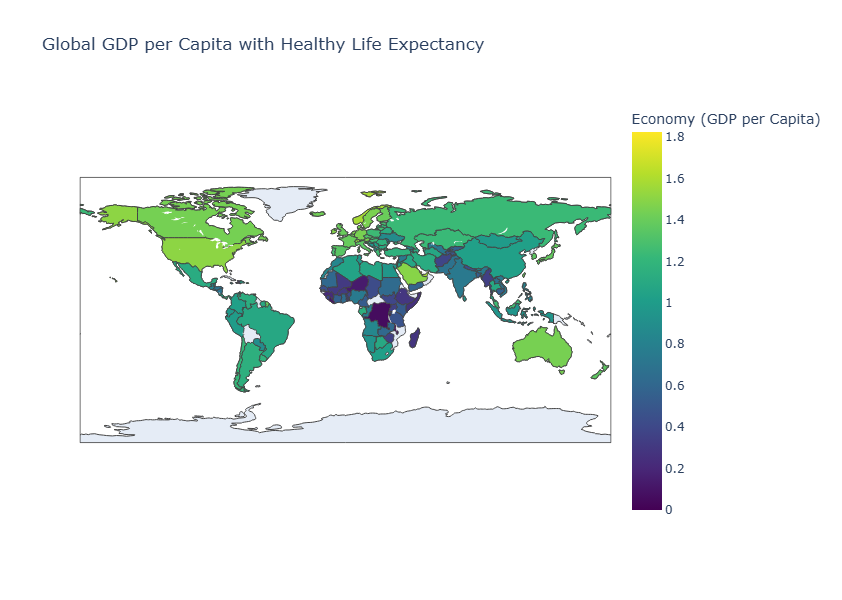

In [64]:
import pandas as pd
import plotly.express as px

# Create choropleth map using Plotly
fig5 = px.choropleth(
    df,
    locations='Country',  
    locationmode='country names',
    color='Economy (GDP per Capita)',
    hover_name='Country',
    hover_data={'Health (Life Expectancy)': True, 'Economy (GDP per Capita)': True},
    color_continuous_scale='Viridis',
    title="Global GDP per Capita with Healthy Life Expectancy",
    width=900,
    height=600
)

# Show the figure
fig5.show()

>Dashboarding and Storytelling

In [65]:
import plotly.io as pio

# List of figures to include in the dashboard
figures = [fig1, fig2, fig3, fig4, fig5]  

# Create an HTML structure to combine multiple figures
html_content = "<html><head><title>Dashboard</title></head><body>"

for fig in figures:
    html_content += pio.to_html(fig, full_html=False, include_plotlyjs='cdn')

html_content += "</body></html>"

# Write to an HTML file
with open("dashboard.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("Dashboard saved as dashboard.html")

Dashboard saved as dashboard.html


>Generate the narrative to present the dashboard

Generate a narrative to present the dashboard on world happiness report with the following charts:
    0. The bar chart Identifying the GDP per capita and Healthy Life Expectancy of the top 10 countries : hong kong (1st place in Health life exp, 3d in GDP), Singapour (1st in GDP, 2nd in Health life exp), japan, south korea, spain, iceland, switzerland, australia, italy and finally Israel (10 position)
    1. A heatmap showing correlation : health life exp vs economy GDP (0.84), happiness vs GDP (0.79), hapiness vs Family (0.74) and hapiness vs Health life exp (0.77)
    2. A scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions (western Europe & north america :highest GDP and highest HEalth Life exp, LAtin america and caribbean: in the middle, sub-saharian africa the lowest GDP and Health life exp)
    3. A pie chart to present Happiness score by Regions (top 5 happiness score: sub-saharian africa(18.6%), entral and esatern europe (18.4%),latin america and caribbean (17.3%), western europe (16.6%), middle east and northern africa (12.1%)
    4. A map to display `GDP per capita` of `countries` and include `Healthy Life Expectancy` to be shown as a tooltip

### **World Happiness Report Dashboard Narrative**

The **World Happiness Report Dashboard** provides a data-driven perspective on the factors influencing global well-being and quality of life. Through interactive visualizations, we explore key indicators such as **GDP per Capita, Healthy Life Expectancy, Family, Freedom, Trust in Government, and Generosity**, uncovering their impact on happiness worldwide.

#### **1. Economic Strength & Healthy Life Expectancy: Bar Chart**
The first visualization presents the **top 10 countries ranked by Healthy Life Expectancy**, highlighting their GDP per Capita. 
- **Hong Kong** leads in Healthy Life Expectancy, securing the **first position**, while placing **third in GDP per Capita**.
- **Singapore** takes the **top spot in GDP per Capita** and **second place in Healthy Life Expectancy**.
- The list continues with **Japan, South Korea, Spain, Iceland, Switzerland, Australia, Italy,** and **Israel**, demonstrating strong economic prosperity coupled with high life expectancy.
This analysis underscores the relationship between financial stability and public health, showing how countries with higher GDP tend to provide better healthcare, leading to longer lifespans.

#### **2. Correlation Among Key Happiness Indicators: Heatmap**
A detailed **heatmap** unveils the **strong correlations** between different factors affecting happiness:
- **Health Life Expectancy vs Economy (GDP)** (0.84) – A high correlation indicating that economic prosperity contributes to better healthcare infrastructure.
- **Happiness vs GDP** (0.79) – Financial security plays a crucial role in overall life satisfaction.
- **Happiness vs Family Support** (0.74) – Strong family connections significantly enhance happiness.
- **Happiness vs Health Life Expectancy** (0.77) – Longer, healthier lives contribute to increased happiness.
These relationships provide compelling evidence of the fundamental elements shaping well-being.

#### **3. The Economic Impact on Happiness: Scatter Plot**
The scatter plot examines the **effect of GDP per Capita on Happiness Scores across various regions**:
- **Western Europe & North America** demonstrate **high GDP and high Healthy Life Expectancy**, showcasing their advanced healthcare systems and economic strength.
- **Latin America & The Caribbean** occupy a **middle ground**, reflecting moderate prosperity with varying levels of life satisfaction.
- **Sub-Saharan Africa** faces **the lowest GDP and Healthy Life Expectancy**, highlighting economic struggles and lower overall happiness.
This visualization underscores global inequalities and the role of wealth distribution in shaping happiness levels.

#### **4. Regional Distribution of Happiness: Pie Chart**
The **pie chart** presents the **Happiness Score distribution across regions**:
- **Sub-Saharan Africa (18.6%)** 
- **Central & Eastern Europe (18.4%)** 
- **Latin America & Caribbean (17.3%)** 
- **Western Europe (16.6%)** 
- **Middle East & North Africa (12.1%)** 
These insights highlight regional variations, emphasizing that cultural, economic, and social structures play a major role in shaping happiness.

#### **5. Global Economic & Health Overview: Map**
The interactive **world map** showcases **GDP per Capita** across countries, with **Healthy Life Expectancy displayed as a tooltip**. Users can explore individual countries, comparing economic well-being and public health outcomes across different regions.

### **Conclusion**
This **World Happiness Report Dashboard** provides a holistic view of **economic well-being, healthcare access, and happiness across the globe**. Through these visualizations, we gain a deeper understanding of the factors influencing happiness, supporting policy decisions and discussions on how to improve well-being worldwide.


## Authors

[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)

<!--
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|

-->


Copyright © 2024 IBM Corporation. All rights reserved.
